In [88]:
%load_ext autoreload
%autoreload 2
from domino.data.imagenet import get_imagenet_dp
import pandas as pd

#data_dp = get_imagenet_dp()
data_dp = get_imagenet_dp.out(6129).load()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [87]:
from domino.utils import split_dp

split_dp(get_imagenet_dp.out(6129), split_on="image_id")

task: split_dp, run_id=6478


In [18]:
from domino.slices.imagenet import ImageNetSliceBuilder, _get_hypernyms

In [91]:
sb = ImageNetSliceBuilder()

In [92]:
slice_dp = sb.build_setting(
    slice_category="rare",
    data_dp=data_dp, 
    split_dp=split_dp.out(6478).load(), 
    target_synset="vehicle.n.01", 
    slice_synsets=["balloon.n.01", "snowmobile.n.01"],
    target_frac=0.5,
    slice_frac=0.01,
    n=100_000,
    synthetic_preds=True,
    synthetic_kwargs={
        "slice_sensitivities": 0.4
    }
)

building
done.


False

In [38]:
hypernym_counts = _get_hypernyms(data_dp)["hypernym"].value_counts()
hypernym_counts[(hypernym_counts < 5) & (hypernym_counts > 3)]

source_of_illumination.n.01    4
personal_computer.n.01         4
crab.n.01                      4
course.n.07                    4
hat.n.01                       4
edge_tool.n.01                 4
skirt.n.02                     4
fence.n.01                     4
spitz.n.01                     4
wheel.n.01                     4
armor.n.01                     4
machine.n.04                   4
woodwind.n.01                  4
fox.n.01                       4
roof.n.01                      4
squash.n.02                    4
grouse.n.02                    4
soft-finned_fish.n.01          4
sennenhunde.n.01               4
support.n.10                   4
cutting_implement.n.01         4
keyboard_instrument.n.01       4
overgarment.n.01               4
aquatic_mammal.n.01            4
cutter.n.06                    4
digital_computer.n.01          4
spiny-finned_fish.n.01         4
gun.n.01                       4
liquid.n.01                    4
fluid.n.01                     4
bear.n.01 

In [40]:
hypernyms = _get_hypernyms(data_dp)


In [42]:
hypernyms[hypernyms["hypernym"] == "big_cat.n.01"]

,synset,hypernym
2114,lion.n.01,big_cat.n.01
4354,snow_leopard.n.01,big_cat.n.01
4852,leopard.n.02,big_cat.n.01
7516,tiger.n.02,big_cat.n.01
10489,jaguar.n.01,big_cat.n.01
11940,cheetah.n.01,big_cat.n.01


In [37]:
preds = synthesize_preds(slice_dp, slice_sensitivity=0.6)

In [40]:
from sklearn.metrics import confusion_matrix, roc_auc_score
mask = (slice_dp["slices"][:, 0] == 1)
tn, fp, fn, tp = confusion_matrix(slice_dp["target"][~mask], preds[~mask] > 0.5).ravel()
print("Out-of-slice sensitivity", tp / (tp + fn))
print("Out-of-slice specificity", tn / (tn + fp))
print("Out-of-slice auroc", roc_auc_score(slice_dp["target"][~mask], preds[~mask]))
tn, fp, fn, tp = confusion_matrix(slice_dp["target"][mask], preds[mask] > 0.5).ravel()
print("In-slice sensitivity", tp / (tp + fn))
print("In-slice specificity", tn / (tn + fp))

Out-of-slice sensitivity 0.831919191919192
Out-of-slice specificity 0.82976
Out-of-slice auroc 0.9197379337373738
In-slice sensitivity 0.598
In-slice specificity nan


/tmp/ipykernel_271326/3515381961.py:9: RuntimeWarning: invalid value encountered in long_scalars
  print("In-slice specificity", tn / (tn + fp))


In [54]:
from domino.slices.imagenet import collect_rare_slices

In [62]:
slices_dp = collect_rare_slices(data_dp)

100%|██████████| 15/15 [00:09<00:00,  1.59it/s]


In [65]:
sb = ImageNetSliceBuilder()
dp = sb.build_slice(
    data_dp=data_dp, 
    split_dp=split_dp.out(6135).load(), 
    **slices_dp[0]
)

In [70]:
slices_dp[1]

{'n': 100000,
 'slice_category': 'rare',
 'slice_frac': 0.001,
 'slice_synsets': ['bobsled.n.02', 'pirate.n.03', 'cab.n.03'],
 'target_frac': 0.5,
 'target_synset': 'vehicle.n.01',
 'index': '1'}

,image_id (PandasSeriesColumn),path (PandasSeriesColumn),split_x (PandasSeriesColumn),index (PandasSeriesColumn),image (ImageColumn),name (PandasSeriesColumn),synset_pos_offset (PandasSeriesColumn),synset (PandasSeriesColumn),target (NumpyArrayColumn),slices (NumpyArrayColumn),input (ImageColumn),id (PandasSeriesColumn),split_y (PandasSeriesColumn)
0,n02860847_4942,/home/common/datasets/imagenet/ILSVRC/Data/CLS-LOC/train/n02860847/n02860847_4942.JPEG,train,578911,,"bobsled, bobsleigh, bob",n02860847,bobsled.n.02,1.0,"np.ndarray(shape=(3,))",,n02860847_4942,train
1,n02860847_14291,/home/common/datasets/imagenet/ILSVRC/Data/CLS-LOC/train/n02860847/n02860847_14291.JPEG,train,578085,,"bobsled, bobsleigh, bob",n02860847,bobsled.n.02,1.0,"np.ndarray(shape=(3,))",,n02860847_14291,test
2,n02860847_8951,/home/common/datasets/imagenet/ILSVRC/Data/CLS-LOC/train/n02860847/n02860847_8951.JPEG,train,579128,,"bobsled, bobsleigh, bob",n02860847,bobsled.n.02,1.0,"np.ndarray(shape=(3,))",,n02860847_8951,train
3,n02860847_10578,/home/common/datasets/imagenet/ILSVRC/Data/CLS-LOC/train/n02860847/n02860847_10578.JPEG,train,577902,,"bobsled, bobsleigh, bob",n02860847,bobsled.n.02,1.0,"np.ndarray(shape=(3,))",,n02860847_10578,train
4,n02860847_6525,/home/common/datasets/imagenet/ILSVRC/Data/CLS-LOC/train/n02860847/n02860847_6525.JPEG,train,578989,,"bobsled, bobsleigh, bob",n02860847,bobsled.n.02,1.0,"np.ndarray(shape=(3,))",,n02860847_6525,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,n02860847_41456,/home/common/datasets/imagenet/ILSVRC/Data/CLS-LOC/train/n02860847/n02860847_41456.JPEG,train,578857,,"bobsled, bobsleigh, bob",n02860847,bobsled.n.02,1.0,"np.ndarray(shape=(3,))",,n02860847_41456,train
781,n02860847_12452,/home/common/datasets/imagenet/ILSVRC/Data/CLS-LOC/train/n02860847/n02860847_12452.JPEG,train,577999,,"bobsled, bobsleigh, bob",n02860847,bobsled.n.02,1.0,"np.ndarray(shape=(3,))",,n02860847_12452,train
782,n02860847_13798,/home/common/datasets/imagenet/ILSVRC/Data/CLS-LOC/train/n02860847/n02860847_13798.JPEG,train,578063,,"bobsled, bobsleigh, bob",n02860847,bobsled.n.02,1.0,"np.ndarray(shape=(3,))",,n02860847_13798,train
783,n02860847_8123,/home/common/datasets/imagenet/ILSVRC/Data/CLS-LOC/train/n02860847/n02860847_8123.JPEG,train,579075,,"bobsled, bobsleigh, bob",n02860847,bobsled.n.02,1.0,"np.ndarray(shape=(3,))",,n02860847_8123,train

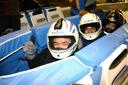
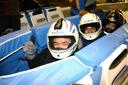
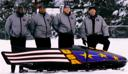
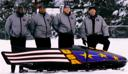
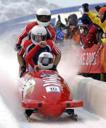
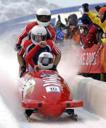
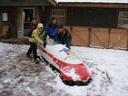
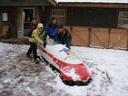
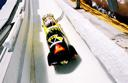
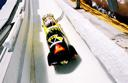
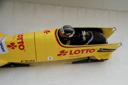
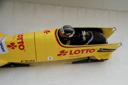
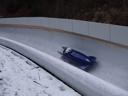
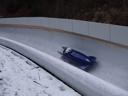
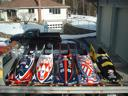
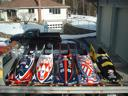
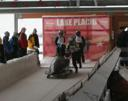
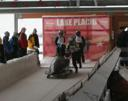
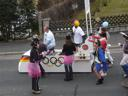
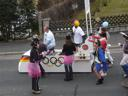

In [71]:
dp.lz[dp["synset"] == "bobsled.n.02"]

<AxesSubplot:>

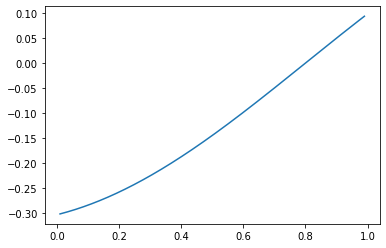

In [135]:
x = np.linspace(0.01,0.99,1000)
sns.lineplot(y=np.sin(np.pi / 2  *  (x - 0.8)) , x=x)

In [206]:
a, b, c, d = 0.4, 0.1, 0.2, 0.3
np.sin(np.pi * a) * np.sin(np.pi * d) /  (np.sin(np.pi * (a + b)) * np.sin(np.pi * (b + d)))
(np.sin(np.pi * (a + b)) * np.sin(np.pi * (b + d)))

0.9510565162951535

In [194]:
from sklearn.metrics import roc_auc_score
n = 1000000
y_hat = np.concatenate([np.random.beta(a, b, n), np.random.beta(c, d, n )])
y = np.concatenate([np.ones(n), np.zeros(n)])

roc_auc_score(y, y_hat)

0.80943104396

In [205]:
np.arcsin(1)

/tmp/ipykernel_132920/2157417419.py:1: RuntimeWarning: invalid value encountered in arcsin
  np.arcsin(1.1)


nan

In [207]:
b_0 = 0.3
a_0 = 0.5 - b_0 

a_1 =  np.arcsin(0.89 * np.sin(np.pi * (b_0 + b_1)) / np.sin(np.pi * b_0)) / np.pi
b_1 = 0.5 - a_1

n = 1000000
y_hat = np.concatenate([np.random.beta(a_1, b_1, n), np.random.beta(a_0, b_0, n )])
y = np.concatenate([np.ones(n), np.zeros(n)])

roc_auc_score(y, y_hat)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [197]:
a_1

0.4524312869031762

In [183]:
x = 0.99
1 / (1 - x)

99.99999999999991

In [83]:
from domino.train import train_model
train_model.get(6222, "best_chkpt")["valid"].load()

,preds (TensorColumn),targets (TensorColumn),ids (PandasSeriesColumn),index (PandasSeriesColumn)
0,torch.Tensor(shape=torch.Size([2])),tensor(1),n04204347_3177,0
1,torch.Tensor(shape=torch.Size([2])),tensor(0),n07590611_4170,1
2,torch.Tensor(shape=torch.Size([2])),tensor(0),n02492035_8265,2
3,torch.Tensor(shape=torch.Size([2])),tensor(1),n03930630_10160,3
4,torch.Tensor(shape=torch.Size([2])),tensor(0),n02101006_1003,4
...,...,...,...,...
10152,torch.Tensor(shape=torch.Size([2])),tensor(1),n03776460_5917,10152
10153,torch.Tensor(shape=torch.Size([2])),tensor(1),n02835271_5868,10153
10154,torch.Tensor(shape=torch.Size([2])),tensor(0),n02841315_3026,10154
10155,torch.Tensor(shape=torch.Size([2])),tensor(1),n04552348_22386,10155


In [84]:
(train_model.inp(6222)["dp"].load()["split"] == "valid").sum()

10157

In [85]:
import terra
terra.out(4681).load()

,image_id (NumpyArrayColumn),split (PandasSeriesColumn)
0,2386621.0,test
1,2373554.0,train
2,2370799.0,train
3,2370791.0,train
4,2370790.0,train
...,...,...
85633,2374606.0,valid
85634,2360947.0,train
85635,2360946.0,train
85636,2379678.0,valid
